In [1]:
#Author: @michaelbrink
#Org: BalloonBox Inc.

In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Imported the data files

In [3]:
df_detail = pd.read_csv('Fortune500-2_cleaned.csv')
df_all = pd.read_csv('Fortune500_cleaned.csv')

# Modelling

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal as mvn

In [5]:
def determine_k_Kmeans(df):
    # Use the Elbow Method to show the optimal k in KMeans
    distortions = []
    K = range(1,15)
    for k in K:
        cluster_model = KMeans(n_clusters=k,random_state=11)
        cluster_model.fit(df)
        distortions.append(sum(np.min(cdist(df,cluster_model.cluster_centers_,'euclidean'),axis=1))/df.shape[0])

    # Plot the elbow
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

## Overall dataset from 2017 to 2020

In [6]:
df_all.head()

,Rank,Name,Revenue ($M),Revenue % change,Profit ($M),Profit % change,Assets ($M),Market Value ($M),Change in rank (1000),Employees,Change in rank (500),Year,Female CEO,Founder CEO
0,1,Walmart,485873.0,0.8,13643.0,-7.2,198825.0,218619.0,0,2300000,0,2017,0,0
1,2,Berkshire Hathaway,223604.0,6.1,24074.0,0.0,620854.0,411035.0,2,367700,2,2017,0,0
2,3,Apple,215639.0,-7.7,45687.0,-14.4,321686.0,753718.0,0,116000,0,2017,0,0
3,4,Exxon Mobil,205004.0,-16.7,7840.0,-51.5,330314.0,340056.0,-2,72700,-2,2017,0,0
4,5,McKesson,192487.0,6.2,2258.0,53.0,56563.0,31439.0,0,68000,0,2017,0,0


In [7]:
df_all.describe()

,Rank,Revenue ($M),Revenue % change,Profit ($M),Profit % change,Assets ($M),Market Value ($M),Change in rank (1000),Employees,Change in rank (500),Year,Female CEO,Founder CEO
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4.000000e+03,4.000000e+03,4000.000000,4.000000e+03,4000.000000,4000.000000,4000.00000,4000.000000
mean,500.497500,14803.662700,8.036800,1170.361400,51.567950,4.684214e+04,2.424514e+04,8.035250,3.394210e+04,1.002000,2018.500000,0.04500,0.026750
std,288.711537,32078.126487,23.743424,3695.396182,1239.939857,2.018646e+05,6.777347e+04,49.363962,9.109079e+04,21.630949,1.118174,0.20733,0.161372
min,1.000000,1791.000000,-75.000000,-22355.000000,-13175.000000,3.850000e+02,0.000000e+00,-310.000000,5.100000e+01,-204.000000,2017.000000,0.00000,0.000000
25%,250.750000,3013.675000,-0.400000,101.150000,-17.625000,3.569125e+03,2.089450e+03,-9.000000,6.400000e+03,0.000000,2017.750000,0.00000,0.000000
50%,500.500000,5442.000000,4.900000,331.100000,0.000000,8.365200e+03,6.692500e+03,1.000000,1.274500e+04,0.000000,2018.500000,0.00000,0.000000
75%,750.250000,12161.225000,11.800000,968.575000,29.625000,2.465230e+04,1.941105e+04,22.000000,2.938400e+04,0.000000,2019.250000,0.00000,0.000000
max,1000.000000,523964.000000,613.200000,81417.000000,66600.000000,3.503319e+06,1.199550e+06,431.000000,2.300000e+06,252.000000,2020.000000,1.00000,1.000000


In [8]:
# Extract features and target
X = df_all.iloc[:,2:]
X.drop(columns=['Year'],inplace=True)
y = df_all['Rank']

# Train and test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)

# Standard Scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Model

In [9]:
from sklearn.linear_model import LinearRegression

# Instantiate the linear model
linear_model = LinearRegression()
# Fit the model
linear_model.fit(X_train_scaled,y_train)

# Coefs for each feature
coefs = list(linear_model.coef_)
# Features
features = X_train.columns
# Create a dict to store the value
res_dict={}
for index,col in enumerate(features):
    res_dict[col] = round(coefs[index],2)
res_dict

{'Revenue ($M)': -143.29,
 'Revenue % change': 19.58,
 'Profit ($M)': 0.35,
 'Profit % change': 4.35,
 'Assets ($M)': -22.73,
 'Market Value ($M)': -27.38,
 'Change in rank (1000)': -3.69,
 'Employees': 26.23,
 'Change in rank (500)': -23.67,
 'Female CEO': -2.25,
 'Founder CEO': 11.42}

MAE: 209.36213490935967
MSE: 60023.4427572527
RMSE: 244.99682193296448


'Results are pretty bad'

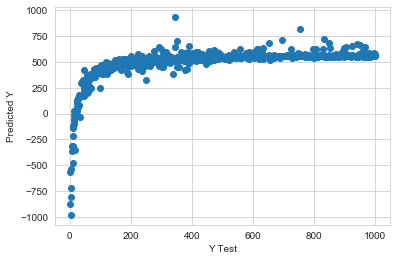

In [10]:
# Prediction vs real value
y_predicted = linear_model.predict(X_test_scaled)
plt.scatter(y_test,y_predicted)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

print('MAE:', metrics.mean_absolute_error(y_test, y_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
'''Results are pretty bad'''

### SVR(Linear)

In [11]:
from sklearn.svm import SVR

# Instantiate the linear model
SVR_model = SVR(kernel='linear')
# Fit the model
SVR_model.fit(X_train_scaled,y_train)

# Coefs for each feature
coefs = list(SVR_model.coef_)
# Features
features = X_train.columns
# Create a dict to store the value
res_dict={}
for index,col in enumerate(features):
    res_dict[col] = round(coefs[0][index],2)
res_dict

{'Revenue ($M)': -125.67,
 'Revenue % change': 7.44,
 'Profit ($M)': -21.4,
 'Profit % change': 7.61,
 'Assets ($M)': -19.66,
 'Market Value ($M)': -39.8,
 'Change in rank (1000)': 7.81,
 'Employees': -70.18,
 'Change in rank (500)': -37.7,
 'Female CEO': 4.75,
 'Founder CEO': 12.84}

MAE: 199.80401888577472
MSE: 61776.755924266865
RMSE: 248.54930280382374


'Results are pretty bad'

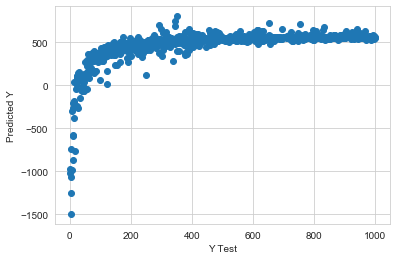

In [12]:
# Prediction vs real value
y_predicted = SVR_model.predict(X_test_scaled)
plt.scatter(y_test,y_predicted)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

print('MAE:', metrics.mean_absolute_error(y_test, y_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
'''Results are pretty bad'''

### SVR(rbf)

MAE: 202.5599121079858
MSE: 56619.06191515855
RMSE: 237.94760329778182


'Results are much better'

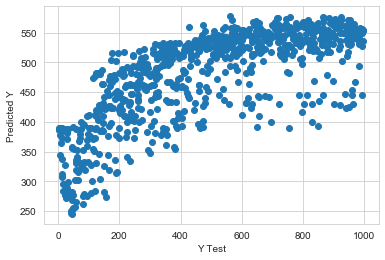

In [13]:
# Instantiate the linear model
SVR_model = SVR()
# Fit the model
SVR_model.fit(X_train_scaled,y_train)

# Prediction vs real value
y_predicted = SVR_model.predict(X_test_scaled)
plt.scatter(y_test,y_predicted)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

print('MAE:', metrics.mean_absolute_error(y_test, y_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
'''Results are much better'''

## Detailed dataset

In [14]:
df_detail.head()

,Country,Headquarters,Industry,CEO,Website,Company Type,Ticker,Revenues ($M),Profits ($M),Market Value ($M),...,Profit as % of Revenues,Profits as % of Assets,Profits as % of Stockholder Equity,Earnings Per Share ($),EPS % Change (from 2018),EPS % Change (5 year annual rate),EPS % Change (10 year annual rate),Total Return to Investors (2019),Total Return to Investors (5 year annualized),Total Return to Investors (10 year annualized)
0,U.S.,Bentonville Ark.,General Merchandisers,C. Douglas McMillon,https://www.walmart.com,Public,WMT,523964.0,14881.0,321803.3,...,2.8,6.3,19.9,5.19,129.6,0.5,3.4,30.3,9.4,11.0
1,U.S.,Seattle Wash.,Internet Services and Retailing,Jeffrey P. Bezos,https://www.amazon.com,Public,AMZN,280522.0,11588.0,970680.1,...,4.1,5.1,18.7,23.01,14.3,0.0,27.4,23.0,42.9,30.0
2,U.S.,Irving Texas,Petroleum Refining,Darren W. Woods,https://www.exxonmobil.com,Public,XOM,264938.0,14340.0,160696.3,...,5.4,4.0,7.5,3.36,-31.1,-15.1,-1.7,7.2,-1.7,3.5
3,U.S.,Cupertino Calif.,Computers Office Equipment,Timothy D. Cook,https://www.apple.com,Public,AAPL,260174.0,55256.0,1112640.8,...,21.2,16.3,61.1,11.89,-0.2,13.0,29.5,89.0,23.7,27.3
4,U.S.,Woonsocket R.I.,Health Care: Pharmacy and Other Services,Larry J. Merlo,https://www.cvshealth.com,Public,CVS,256776.0,6634.0,77375.8,...,2.6,3.0,10.4,5.08,0.0,5.1,7.1,17.1,-2.8,10.8


In [15]:
df_detail.describe()

,Revenues ($M),Profits ($M),Market Value ($M),Employees,Assets ($M),Total Stockholder Equity ($M),Profit as % of Revenues,Profits as % of Assets,Profits as % of Stockholder Equity,Earnings Per Share ($),EPS % Change (from 2018),EPS % Change (5 year annual rate),EPS % Change (10 year annual rate),Total Return to Investors (2019),Total Return to Investors (5 year annualized),Total Return to Investors (10 year annualized)
count,932.000000,932.000000,9.320000e+02,9.320000e+02,9.320000e+02,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000
mean,16058.042489,1378.710515,2.473842e+04,3.523933e+04,5.020907e+04,9290.556330,7.565451,4.256974,20.620815,57.403112,10.353433,7.680472,6.490451,27.288412,6.251288,9.539914
std,35699.281885,4656.025015,7.975675e+04,9.391153e+04,2.162442e+05,26408.884962,13.091542,7.761241,150.904781,1632.101122,565.324773,17.516276,10.675961,35.253048,14.469244,10.611181
min,1990.300000,-8506.000000,2.200000e+00,5.100000e+01,7.054000e+02,-8617.000000,-72.900000,-46.400000,-849.800000,-72.540000,-8672.700000,-58.400000,-35.900000,-98.400000,-71.900000,-54.200000
25%,3162.825000,108.825000,1.673775e+03,6.994250e+03,3.912850e+03,1087.950000,2.100000,1.300000,4.475000,1.065000,-18.625000,0.000000,0.000000,8.200000,0.000000,0.000000
50%,5621.400000,380.700000,5.727600e+03,1.368400e+04,8.906300e+03,2662.350000,6.600000,4.000000,12.100000,2.855000,0.000000,4.550000,0.000000,26.700000,7.000000,10.700000
75%,12866.925000,1113.750000,1.855135e+04,3.000000e+04,2.686065e+04,7614.900000,12.825000,7.525000,20.025000,5.200000,21.225000,14.125000,11.875000,44.775000,15.100000,16.400000
max,523964.000000,81417.000000,1.199550e+06,2.200000e+06,3.503319e+06,424791.000000,76.100000,35.400000,3704.300000,49828.000000,12950.000000,166.900000,98.400000,324.100000,76.600000,47.500000


In [16]:
# Drop the categories data
cols=['Country','Headquarters','Industry','CEO','Website','Company Type','Ticker']
if 'Country' in df_detail.columns:
    df_detail.drop(columns=cols,inplace=True)

# Standard Scaler
scaler = StandardScaler()
scaler.fit(df_detail)
df_detail_scaled = scaler.transform(df_detail)
df_scaled = pd.DataFrame(data=df_detail_scaled,columns=df_detail.columns)

In [17]:
df_scaled.head()

,Revenues ($M),Profits ($M),Market Value ($M),Employees,Assets ($M),Total Stockholder Equity ($M),Profit as % of Revenues,Profits as % of Assets,Profits as % of Stockholder Equity,Earnings Per Share ($),EPS % Change (from 2018),EPS % Change (5 year annual rate),EPS % Change (10 year annual rate),Total Return to Investors (2019),Total Return to Investors (5 year annualized),Total Return to Investors (10 year annualized)
0,14.234983,2.901518,3.726636,23.063441,0.861924,2.476952,-0.364205,0.263376,-0.004779,-0.032009,0.211048,-0.410152,-0.289633,0.085474,0.217731,0.137673
1,7.412081,2.193882,11.866701,8.126481,0.809885,1.999243,-0.264851,0.108678,-0.012735,-0.021084,0.006985,-0.438712,1.959615,-0.121712,2.534230,1.929198
2,6.975311,2.785262,1.705572,0.422546,1.445383,6.908938,-0.165497,-0.033128,-0.086994,-0.033130,-0.073366,-1.301230,-0.767598,-0.570141,-0.549825,-0.569508
3,6.841791,11.577734,13.647578,1.084162,1.333963,3.076277,1.042037,1.552521,0.268387,-0.027901,-0.018678,0.303854,2.156425,1.751472,1.206565,1.674613
4,6.746556,1.129313,0.660328,2.714230,0.796934,2.067590,-0.379491,-0.162042,-0.067767,-0.032076,-0.018324,-0.147398,0.057126,-0.289163,-0.625889,0.118815


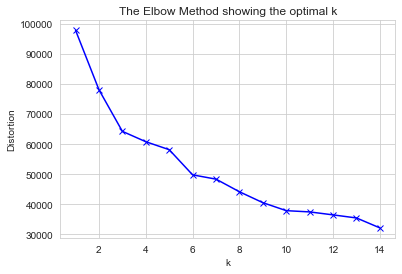

'K=5'

In [18]:
determine_k_Kmeans(df_detail)
'''K=5'''

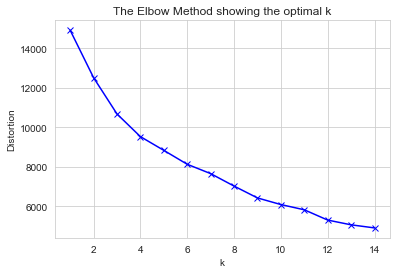

'K=4'

In [19]:
k_range = np.arange(1,15)
inertia_list = []
for k in k_range:
    cluster_model=KMeans(n_clusters=k,random_state=11)
    cluster_model.fit(df_scaled)
    inertia_list.append(cluster_model.inertia_)

# Plot the elbow
plt.plot(k_range, inertia_list, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
'''K=4'''

In [20]:
# Fit the KMeans clustering model with K=4
cluster_model=KMeans(n_clusters=4,random_state=11)
# Predict the labels
labels = cluster_model.fit_predict(df_detail)

# centroids Information
centroids = pd.DataFrame(cluster_model.cluster_centers_,columns=df_scaled.columns)
centroids.round(1).T

,0,1,2,3
Revenues ($M),11167.8,109828.9,109800.7,523964.0
Profits ($M),753.6,13576.6,20697.5,14881.0
Market Value ($M),15538.9,235265.6,111744.9,321803.3
Employees,27182.6,157464.5,156550.7,2200000.0
Assets ($M),21476.4,363922.4,2451185.5,236495.0
Total Stockholder Equity ($M),5341.1,82865.3,155043.0,74669.0
Profit as % of Revenues,7.2,14.5,18.1,2.8
Profits as % of Assets,4.2,5.3,0.9,6.3
Profits as % of Stockholder Equity,20.7,15.0,36.8,19.9
Earnings Per Share ($),3.8,1431.2,4.2,5.2
